<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_semaine2_notebook1_reseaux_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Réseaux de neurones en PyTorch


### Les limites de la régression logistique
- Peut représenter les fonctions **linéaires** correctement
    - $ y = 2x + 3$
    - $ y = x_1 + x_2 $
    - $ y = x_1 + 3x_2 + 4x_3 $
- Ne peut pas représenter des fonctions **non-linéaires** 
    - $ y = 4x_1 + 2x_2^2 +3x_3^3 $
    - $ y = x_1x_2$


## Introduisons donc une fonction non linéaire
### Types de fonctions non-linéaires:

- ReLUs (Rectified Linear Units)      
- Sigmoid     
- Tanh
- Leaky ReLUs

#### Sigmoid
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Ouput compris dans l'interval [0, 1]
- Inconvénients: 
    1. Activation saturé at 0 ou 1 avec **gradients $\approx$ 0**
        - Si on a pas de signal (pas de pente conséquente) pour mettre à jour les poids $\rightarrow$ **on ne pourra pas apprendre**
        - Solution: Faire attention à l'initialisation des poids
    2. Les outputs ne sont pas centrés autour de 0 
        - Si l'output est toujours positif $\rightarrow$ les gradients sont soit positifs soit negatifs $\rightarrow$ **mauvais pour la mise à jour des gradients** 

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - Fonction sigmoid shifté et centré en 0
- Ouput compris dans l'interval $\rightarrow$ [-1, 1]
- Inconvénients: 
    1. Activation sature a 0 ou 1 avec **gradients $\approx$ 0**
        - Si on a pas de signal (pas de pente conséquente) pour mettre à jour les poids $\rightarrow$ **on ne pourra pas apprendre**
        - **Solution**: Faire attention à l'initialisation des poids

 
#### ReLUs
- $f(x) = \max(0, x)$
- Avantages:
    1. Accelère la convergence $\rightarrow$ **entrainement plus rapide**
    2. **Cout d'apprentissage plus faible** comparé aux fonctions Sigmoid/Tanh
- Inconvénients:
    1. Certaines ReLU units "meurent" $\rightarrow$ leur **gradient devient nul**
        - **Solution**: Faire attention au choix du taux d'apprentissage (learning rate)
      


## 2. Construction d'un réseau de neurones en PyTorch

### Modèle A: 1 réseau de neurones avec une couche cachée (fonction d'activation tanh)
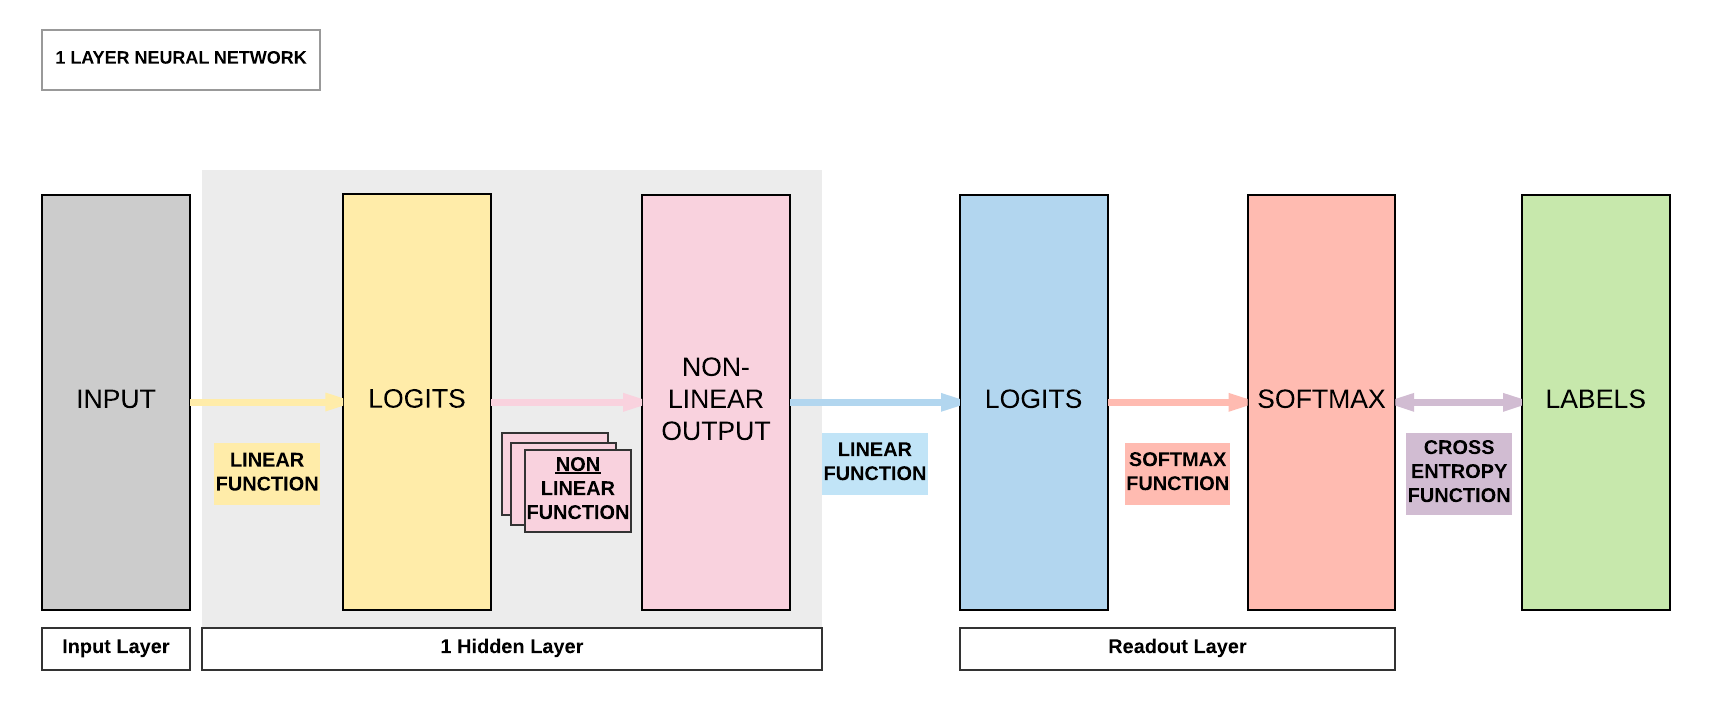

### Etapes
- Etape 1: Charger les données (entraînement et test)
- Etape 2: Rendre les données iterables
- Etape 3: Créer la classe du modèle
- Etape 4: Instancier la classe du modèle
- Etape 5: Instancier la loss classe
- Etape 6: Instancier la classe de l'optimizer
- Etape 7: Entrainer le modèle

### ETAPE 1: CHARGEMENT DES DONNEES MNIST
**Images de 1 à 9**

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [4]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### ETAPE 2: RENDRE LES DONNEES ITERABLES

In [5]:
60000 / 100

600.0

In [6]:
6000 / 600

10.0

In [7]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### ETAPE 3: CREER LA CLASSE DU MODELE

In [8]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

###  INSTANCIER LA CLASSE DU MODELE
- Dimension d'entrée: **784** 
    - Taille de l'image
    - $28 \times 28 = 784$
- Dimension de sortie: **10**
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- Dimension couche cachée (nombre de neurones/ nombre de fonctions d'activation non linéaires): **100**
    - Peut être n'importe quel nombre

In [33]:
input_dim = 28*28
hidden_dim = 300
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
model.to(device)
relu1 = nn.ReLU(inplace=False)

### ETAPE 5: INSTANCIER LA LOSS CLASSE
- Résaux de neurones: **Cross Entropy Loss**
    - _Regression Logisitique_: **Cross Entropy Loss**
    - _Regression Linéaire_: **MSE**
   

In [34]:
criterion = nn.CrossEntropyLoss()

### ETAPE 6: INSTANCIER LA CLASSE DE L'OPTIMIZER
- Equation simplifié:
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: paramètres (Pytorch tensors avec gradients cumulés)
        - $\eta$: taux/vitesse d'apprentissage (learning rate)
        - $\nabla_\theta$: gradients calculés
- Equation encore plus simple
    - `parametres = parametres - taux_apprentissage * parametres_gradients`
    - **A chaque itération, on met à jour les paramètres modèle**

In [35]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Taille des Paramètres

In [36]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

<generator object Module.parameters at 0x7f6feea066d0>
4
torch.Size([300, 784])
torch.Size([300])
torch.Size([10, 300])
torch.Size([10])


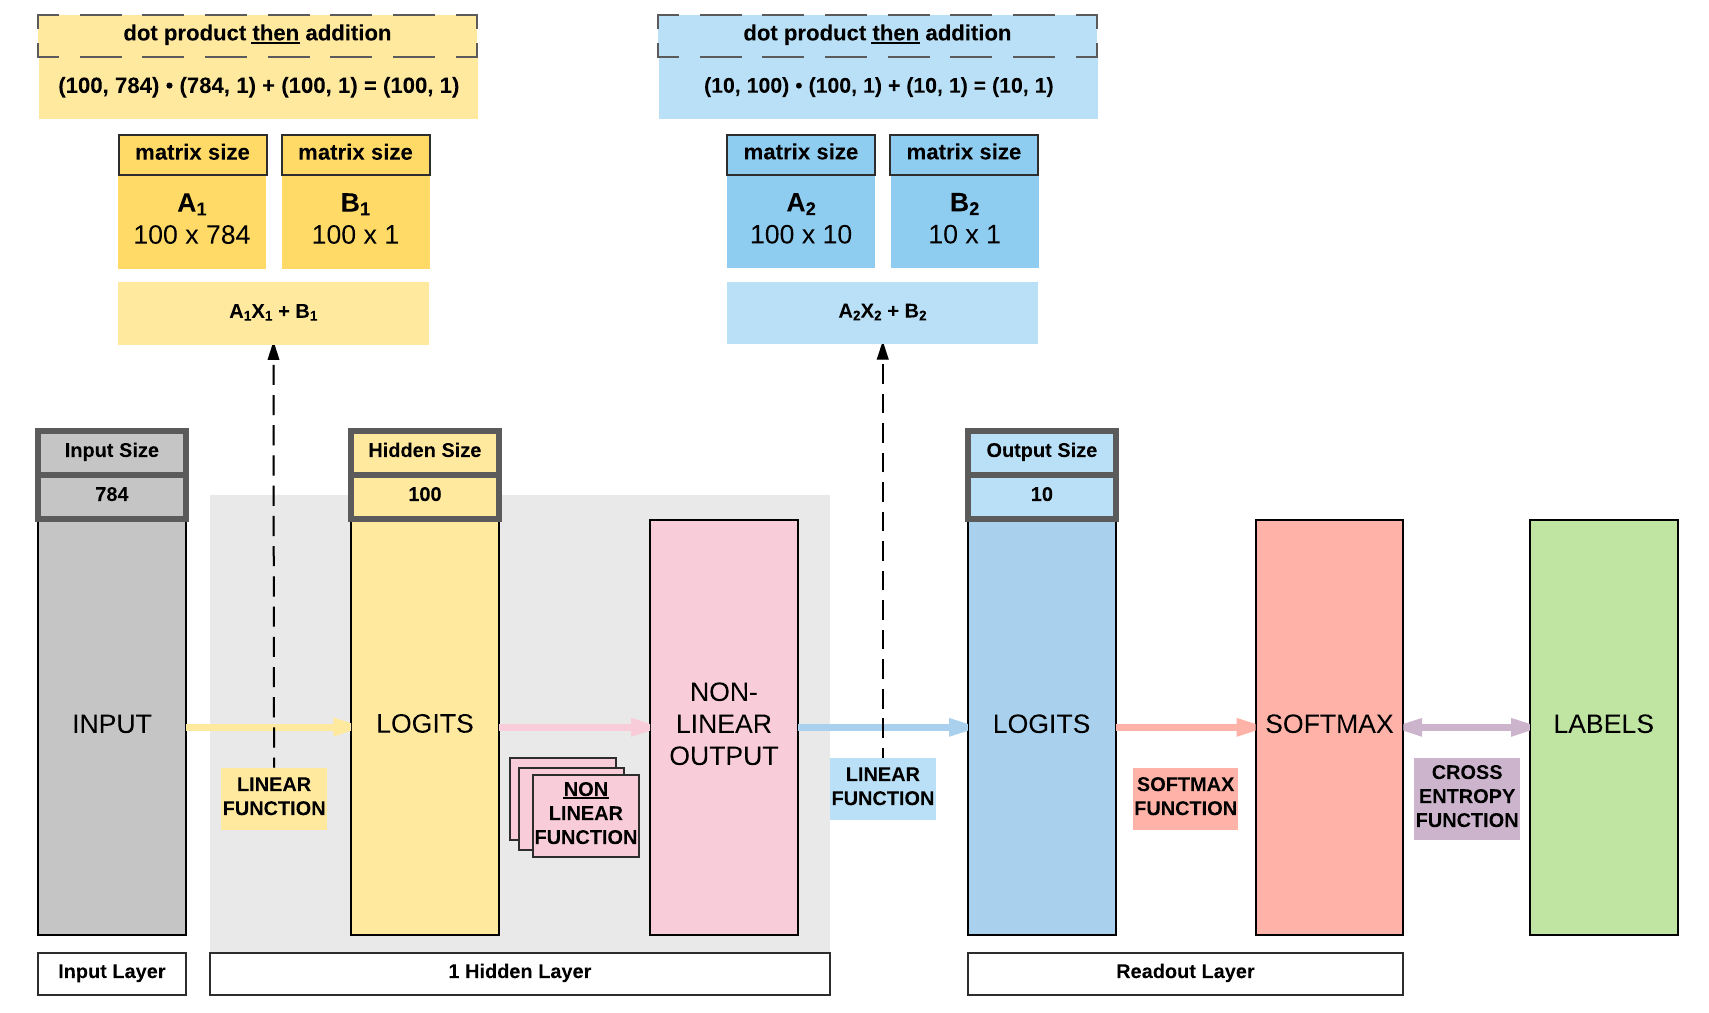

### Step 7: ENTRAINEMENT DU MODELE
- Process     
    1. Convertir les données d'entrée/labeles en tensors (avec possibilité d'accumuler des gradients)
    2. Nettoyer les gradients
    3. Recupérer les outputs des inputs associés 
    4. Calcul de la loss
    5. Calcul des gradients en fonction des paramètres
    6. Mettre à jour les paramètres en fonction des gradients calculés
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPETER

In [37]:
iter = 0 
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Charger les images et créer les variables
        images = images.view(-1, 28*28).requires_grad_()
        images = images.to(device)
        labels = labels.to(device)
        # Nettoyer les gradients
        optimizer.zero_grad()
        
        # Forward pass pour calculer l'output
        outputs = model(images)
        #On ajoute le ReLU
        model.add_module("Relu1",relu1) 
        # Calcul de la loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Calcul de gradients en fonction des paramètres
        loss.backward()
        
        # Mise a jour des paramètres
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculer la précision (Accuracy)         
            correct = 0
            total = 0
            # Itérer sur le dataset de test
            for images, labels in test_loader:
                # Charger les images en variable torch 
                images = images.view(-1, 28*28).requires_grad_()
                images = images.to(device)
                labels = labels.to(device)
                # Forward pass pour calculer les logits/output
                outputs = model(images)
                
                # Recupérer les prédictions de la valeur maximum
                _, predicted = torch.max(outputs.data, 1)
                
                # Nombre total de labels
                total += labels.size(0)
                
                # Total des prédictions correctes
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Afficher la loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.3175361156463623. Accuracy: 90.98999786376953
Iteration: 1000. Loss: 0.2502202093601227. Accuracy: 92.25
Iteration: 1500. Loss: 0.22320659458637238. Accuracy: 92.75999450683594
Iteration: 2000. Loss: 0.2985256314277649. Accuracy: 93.47000122070312
Iteration: 2500. Loss: 0.22117653489112854. Accuracy: 93.98999786376953
Iteration: 3000. Loss: 0.21388258039951324. Accuracy: 94.41999816894531


# Résumé

- **Types** de fonctions non-linéaires
    - Sigmoid
    - Tanh
    - ReLU
    - Leaky ReLU

- Moyens d'augementer la performance du modèle
    - Ajouter plus de fonctions d'activation (**neurones**)
    - Ajouter plus de couches cachées
- **Inconvénients** 
    - Besoin de plus de **données**
    - N'augmente pas forcément **l'accuracy**
- **GPU** Code
    - 2 modification pour le passage de CPU à GPU
        - **modèle**
        - **tensors avec accumulation de gradients**
    - Modifier seulement l'**Etape 4 et 7**
- **7 Etapes** pour la construction du modèle
    - Etape 1: Charger les données (entraînement et test)
    - Etape 2: Rendre les données iterables
    - Etape 3: Créer la classe du modèle
    - Etape 4: Instancier la classe du modèle
    - Etape 5: Instancier la loss classe
    - Etape 6: Instancier la classe de l'optimizer
    - Etape 7: Entrainer le modèle



# Exercices

1 - Modifier le code pour l'entraînement sur GPU
    Aide: Deux modifications pour le passage de CPU à GPU
            - **modèle**
            - **tensors avec accumulation de gradients**
        - Il suffit donc de modifier seulement l'**Etape 4 et 7**
2 - Modifier le code pour utiliser une fonction d'activation ReLU activation

3 - Ajouter 2 autres couches cachées au réseaux de neurones

4 - Que constatez-vous ?

In [3]:
#!pip install torch==1.7.0+cu92 torchvision==0.8.1+cu92 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
#device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
#device

#Je constate que lorsque j'ai ajouté la fonction d'activation ReLU, la précision s'est beaucoup améliorée, 
#mais elle a rebaissé lorsque j'ai modifié le nombre de couches cachées (j'ai utilisé 300 au lieu de 100 sur l'étape 4)

device(type='cuda', index=0)